## 项目: 用线性回归预测房价数据

#### 分析目标

此数据分析报告的目的是, 基于已有的房屋销售价格, 以及有关该房屋的属性, 进行线性回归分析, 从而利用得到的线性回归模型, 能对以下未知售价的房屋根据属性进行价格预测:<br>
<br>
面积为6500平方英尺, 有4个卧室、2个厕所，总共2层, 不位于主路, 无客人房, 带地下室, 有热水器, 没有空调, 车位数为2, 位于城是首选社区, 简装修。

## 简介

数据集`house_price.csv`记录了超过500栋房屋的交易价格, 以及房屋的相关属性信息, 包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。<br>
<br>
`house_price.csv`每列的含义如下:
- price: 房屋出售价格
- area: 房屋面积, 以平方英尺为单位
- bedrooms: 卧室数
- stories: 楼层数
- mainroad: 是否位于主路
    - yes: 是
    - no: 否
- guestroom: 是否有客房
    - yes: 是
    - no: 否
- basement: 是否有地下室
    - yes: 是
    - no: 否
- hotwaterheating: 是否有热水器
    - yes: 是
    - no: 否
- airconditioning: 是否有空调
    - yes: 是
    - no: 否
- parking: 车库容量, 以车辆数量为单位
- prefarea: 是否位于城市首选社区
    - yes: 是
    - no: 否
- furningstatus: 装修状态
    - furnished 精装
    - semi-funished 简装
    - unfurnished 毛坯

#### 读取数据

导入数据分析所需要的库

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

导入数据分析所需要的库, 并通过Pandas的`read_csv`函数, 将原始数据文件"house_price.csv"里的数据内容, 解析为DataFrame并赋值给变量`Original_House_Price`。

In [2]:
Original_House_Price = pd.read_csv(".\\House_Price_Prediction\\Housing.csv")
Original_House_Price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### 评估和清理数据

在这一部分中, 我们将对上一部分建立的`Original_House_Price`DataFrame所包含的数据进行评估和清理。<br>
<br>
主要从两个方面进行: 结构和内容, 即整齐度和干净度。<br>
<br>
数据的结构性问题指不符合"每个变量为一列, 每个观察值为一行, 每种类型的观察单位为一个表格"这三个标准; 数据的内容型问题包括存在丢失数据、重复数据、无效数据等。<br>
<br>
为了区分开经过清理的数据和原始的数据, 我们创建新的变量`Cleaned_House_Price`, 让它为`Original_House_Price`复制出的副本, 我们之后的清理步骤都将被运用在`Cleaned_House_Price`上。

In [3]:
Cleaned_House_Price = Original_House_Price.copy()

#### 数据整齐度

In [4]:
Cleaned_House_Price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


从头部的10行数据来看, 数据符合"每个变量为一列, 每个观察值为一行, 每种类型的观察单位为一个表格", 因此不存在结构性问题。

#### 数据干净度

接下来通过`info`, 对数据内容进行大致了解。

In [5]:
Cleaned_House_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


从输出结果来看, `Cleaned_House_Price`共有545条观察值, 变量不存在缺失度。<br>
<br>
数据类型方面, 我们已知`mainroad`(是否位于主路)、`guestroom`(是否有客房)、`basement`(是否有地下室)、`hotwaterheating`(是否有热水器)、`airconditioning`(是否有空调)、`prefarea`(是否位于城市首选社区)、`furnishingststus`(装修状态)都是分类数据, 可以把数据类型转换为Category。

In [6]:
Cleaned_House_Price['mainroad'] = Cleaned_House_Price['mainroad'].astype('category')
Cleaned_House_Price['guestroom'] = Cleaned_House_Price['guestroom'].astype('category')
Cleaned_House_Price['basement'] = Cleaned_House_Price['basement'].astype('category')
Cleaned_House_Price['hotwaterheating'] = Cleaned_House_Price['hotwaterheating'].astype('category')
Cleaned_House_Price['airconditioning'] = Cleaned_House_Price['airconditioning'].astype('category')
Cleaned_House_Price['prefarea'] = Cleaned_House_Price['prefarea'].astype('category')
Cleaned_House_Price['furnishingstatus'] = Cleaned_House_Price['furnishingstatus'].astype('category')

In [7]:
Cleaned_House_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#### 处理缺失数据

从`info`方法的输出结果来看, `Cleaced_House_Price`不存在缺失值, 因此不需要对缺失值进行处理。

#### 处理重复数据

根据数据变量的含义以及内容来看, 允许变量重复, 我们不需要对此数据检查是否存在重复值。

#### 处理不一致数据

不一致数据可能存在与所有分类变量中, 我们要查看是否存在不同值实际指代同一目标的情况。

In [8]:
Cleaned_House_Price["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [9]:
Cleaned_House_Price["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [10]:
Cleaned_House_Price["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [11]:
Cleaned_House_Price["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [12]:
Cleaned_House_Price["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

从以上输出结果来看, 均不存在不一致数据。

#### 处理无效或错误数据

可以通过DataFrame的`describe`方法, 对谁统计信息进行快速了解。

In [13]:
Cleaned_House_Price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


从以上统计信息来看, `Cleaned_House_Price`里不存在脱离现实意义的数值。

#### 探索数据

在着手推断统计学分析之前, 我们可以先借助数据可视化，探索数据变量的分布, 以及与房价存在相关性的变量, 为后续的进一步分析提供方向。

In [14]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

#### 房价分布

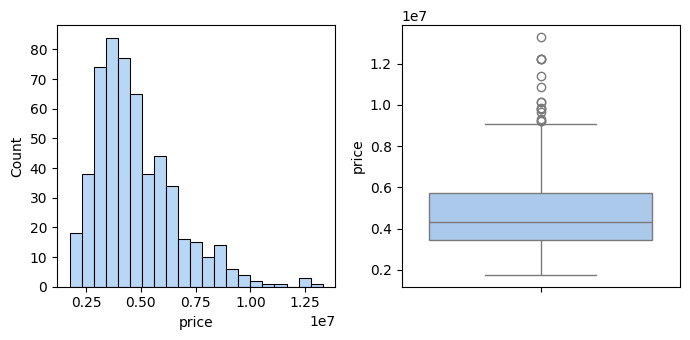

In [15]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
Figure, Axes = plt.subplots(1, 2)
sns.histplot(Cleaned_House_Price, x = 'price', ax = Axes[0])
sns.boxplot(Cleaned_House_Price, y = 'price', ax = Axes[1])
plt.show()

#### 面积分布

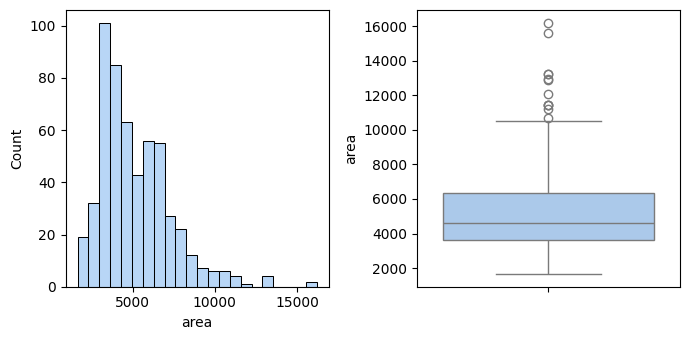

In [16]:
Figure, Axes = plt.subplots(1, 2)
sns.histplot(Cleaned_House_Price, x = 'area', ax = Axes[0])
sns.boxplot(Cleaned_House_Price, y = 'area', ax = Axes[1])
plt.show()

面积的分布与房价相似，也是右偏态分布。

#### 房价与面积的关系

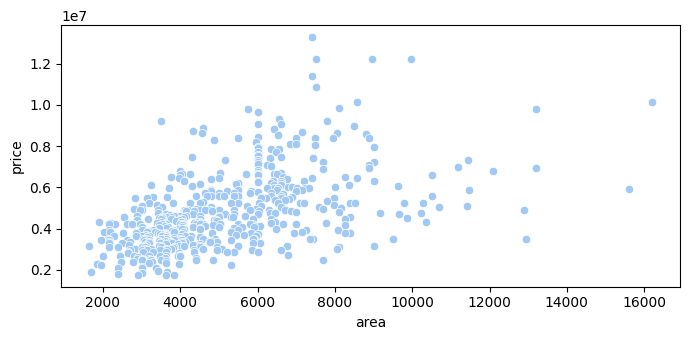

In [17]:
sns.scatterplot(Cleaned_House_Price, x = 'area', y = 'price')
plt.show()

从散点图来看, 能大致看出一些正相关关系, 但关系的强度需要后续通过计算相关性来得到。

#### 卧室数与房价

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19496\723863537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Cleaned_House_Price, x = 'bedrooms', y = 'price', ax = Axes[1], palette="pastel")


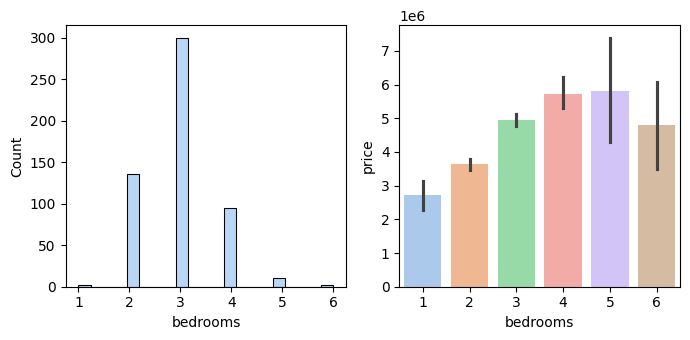

In [18]:
Figure, Axes = plt.subplots(1, 2)
sns.histplot(Cleaned_House_Price, x = 'bedrooms', ax = Axes[0])
sns.barplot(Cleaned_House_Price, x = 'bedrooms', y = 'price', ax = Axes[1], palette="pastel")
plt.show()

此数据集中房子的卧室数范围为1-6个，其中大多数房子有2-4个。<br>
<br>
从平均房价与卧室数之间的柱状图来看, 当卧室数小于5个时, 卧室数多的房子价格也相应高, 但一旦多于5个, 房价不一定相应更高。

#### 洗手间数与房价

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19496\2776778728.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Cleaned_House_Price, x = 'bathrooms', y = 'price', ax = Axes[1], palette="pastel")


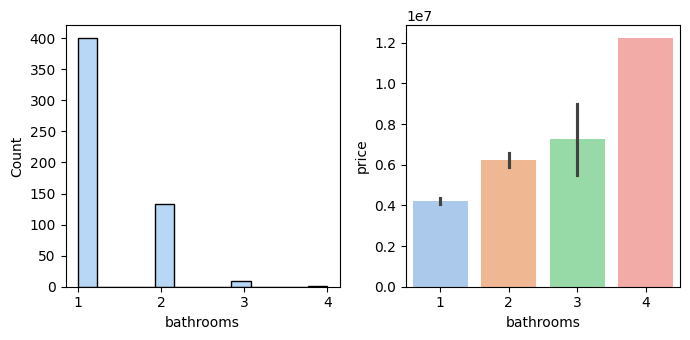

In [19]:
Figure, Axes = plt.subplots(1, 2)
sns.histplot(Cleaned_House_Price, x = 'bathrooms', ax = Axes[0])
sns.barplot(Cleaned_House_Price, x = 'bathrooms', y = 'price', ax = Axes[1], palette="pastel")
plt.show()

数据集中房子洗手间数量最少1个, 最多4个, 其中为1个的数量最多。<br>
<br>
从平均房价与洗手间数之间的柱状图来看, 洗手间多的房子价格也相应高。

#### 楼层数与房价

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19496\3722551681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Cleaned_House_Price, x = 'stories', y = 'price', ax = Axes[1], palette="pastel")


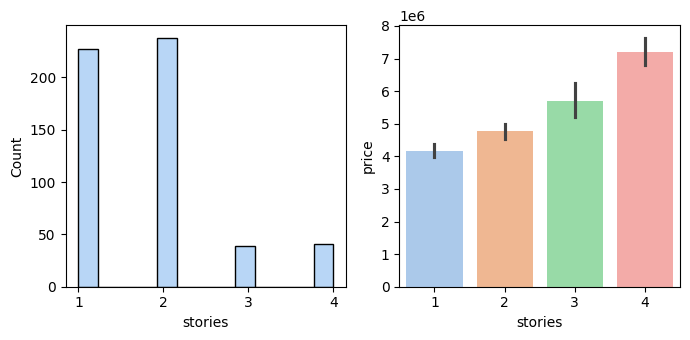

In [20]:
Figure, Axes = plt.subplots(1, 2)
sns.histplot(Cleaned_House_Price, x = 'stories', ax = Axes[0])
sns.barplot(Cleaned_House_Price, x = 'stories', y = 'price', ax = Axes[1], palette="pastel")
plt.show()

此数据集中房子的楼层数范围为1-4层, 其中大多数房子有1层或2层。<br>
<br>
从平均数房价与楼层数之间的柱状图来看, 楼层多的房子价格也相应高。

#### 车库数与房价

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19496\3924523564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Cleaned_House_Price, x = 'parking', y = 'price', ax = Axes[1], palette="pastel")


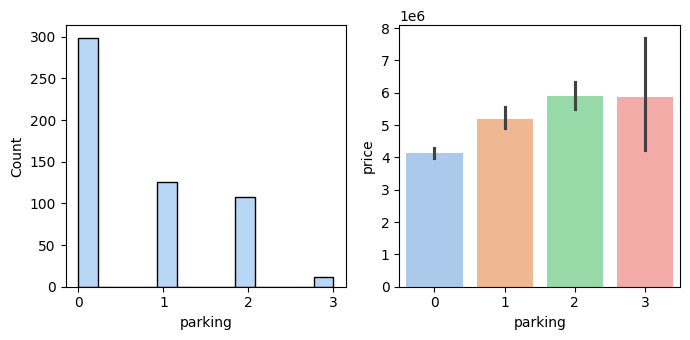

In [21]:
Figure, Axes = plt.subplots(1, 2)
sns.histplot(Cleaned_House_Price, x = 'parking', ax = Axes[0])
sns.barplot(Cleaned_House_Price, x = 'parking', y = 'price', ax = Axes[1], palette="pastel")
plt.show()

此数据集中房子的车库数范围为0-3个, 不带车库的房子数量是最多的, 其次是1个和2个。<br>
<br>
从平均房价与楼层之间的柱状图来看, 车库多的房子价格也相应高, 但超过2个后, 放假并不一定相应更高。

#### 是否在主路与房价

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19496\3924870423.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Cleaned_House_Price, x = 'mainroad', y = 'price', ax = Axes[1], palette="pastel")


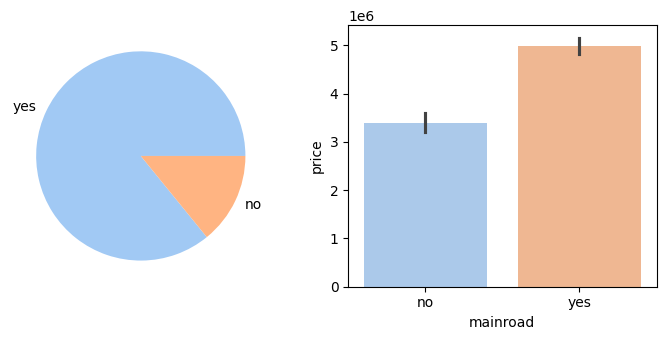

In [22]:
Figure, Axes = plt.subplots(1, 2)
MainRoad_Count = Cleaned_House_Price['mainroad'].value_counts()
MainRoad_Label = MainRoad_Count.index
Axes[0].pie(MainRoad_Count, labels = MainRoad_Label)
sns.barplot(Cleaned_House_Price, x = 'mainroad', y = 'price', ax = Axes[1], palette="pastel")
plt.show()

此数据集中房子大多位于主路。<br>
<br>
从平均房价与楼层数来看, 在主路的房子价格也相应高。

#### 是否有客人房与房价

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19496\2138753231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Cleaned_House_Price, x = 'guestroom', y = 'price', ax = Axes[1], palette="pastel")


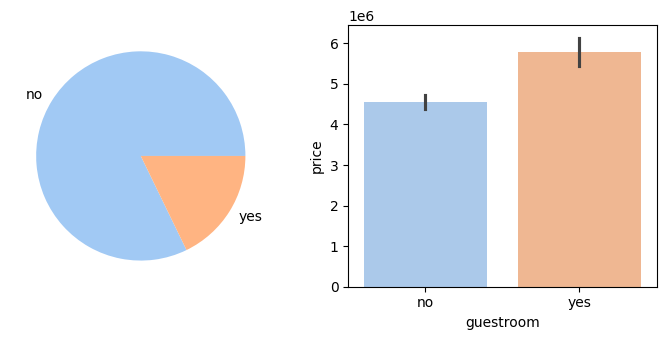

In [23]:
Figure, Axes = plt.subplots(1, 2)
GuestRoom_Count = Cleaned_House_Price['guestroom'].value_counts()
GuestRoom_Label = GuestRoom_Count.index
Axes[0].pie(GuestRoom_Count, labels = GuestRoom_Label)
sns.barplot(Cleaned_House_Price, x = 'guestroom', y = 'price', ax = Axes[1], palette="pastel")
plt.show()

此数据集中房子大部分没有客人房。<br>
<br>
从平均房价与楼层数之间的柱状图来看, 有客人房的房子价格也相应高。

#### 是否有地下室与房价

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19496\3664583750.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Cleaned_House_Price, x = 'basement', y = 'price', ax = Axes[1], palette="pastel")


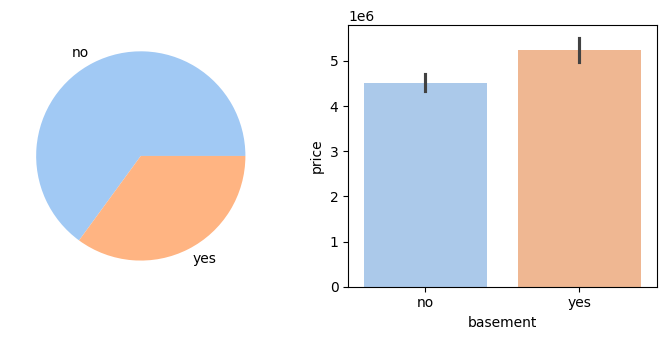

In [24]:
Figure, Axes = plt.subplots(1, 2)
Basement_Count = Cleaned_House_Price['basement'].value_counts()
Basement_Label = Basement_Count.index
Axes[0].pie(Basement_Count, labels = Basement_Label)
sns.barplot(Cleaned_House_Price, x = 'basement', y = 'price', ax = Axes[1], palette="pastel")
plt.show()

此数据集中房子大部分没有地下室。<br>
<br>
从平均房价与地下室之间的柱状图来看, 有地下室的房子价格也相应高。

#### 是否有热水器与房价

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19496\1328965666.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Cleaned_House_Price, x = 'hotwaterheating', y = 'price', ax = Axes[1], palette="pastel")


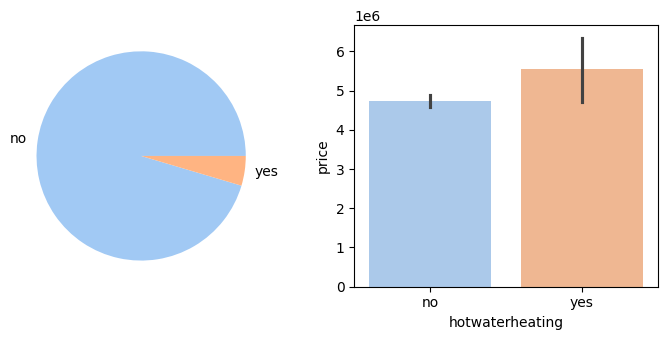

In [25]:
Figure, Axes = plt.subplots(1, 2)
HotwaterHeating_Count = Cleaned_House_Price['hotwaterheating'].value_counts()
HotwaterHeating_Label = HotwaterHeating_Count.index
Axes[0].pie(HotwaterHeating_Count, labels = HotwaterHeating_Label)
sns.barplot(Cleaned_House_Price, x = 'hotwaterheating', y = 'price', ax = Axes[1], palette="pastel")
plt.show()


此数据集中房子大部分没有热水器。<br>
<br>
从平均房价与热水器之间的柱状图来看, 有热水器的房子价格也相应高。

是否有空调与房价

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19496\1262087024.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Cleaned_House_Price, x = 'airconditioning', y = 'price', ax = Axes[1], palette="pastel")


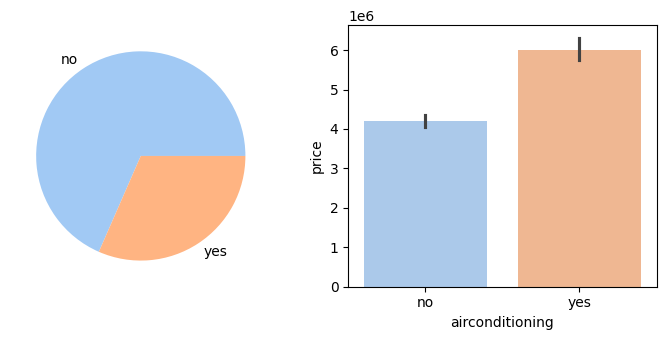

In [26]:
Figure, Axes = plt.subplots(1, 2)
Airconditioning_Count = Cleaned_House_Price['airconditioning'].value_counts()
Airconditioning_Label = Airconditioning_Count.index
Axes[0].pie(Airconditioning_Count, labels = Airconditioning_Label)
sns.barplot(Cleaned_House_Price, x = 'airconditioning', y = 'price', ax = Axes[1], palette="pastel")
plt.show()

此数据集中房子大部分没有空调。<br>
<br>
从平均房价与空调之间的柱状图来看, 有空调的房子价格也相应高。

是否位于城市首选社区与房价

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19496\4020569669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Cleaned_House_Price, x = 'prefarea', y = 'price', ax = Axes[1], palette="pastel")


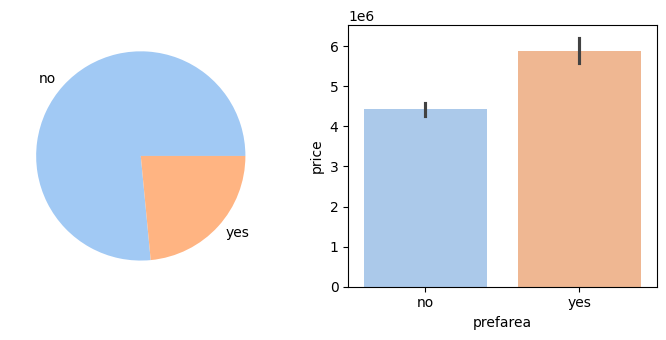

In [27]:
Figure, Axes = plt.subplots(1, 2)
PreFarea_Count = Cleaned_House_Price['prefarea'].value_counts()
PreFarea_Label = PreFarea_Count.index
Axes[0].pie(PreFarea_Count, labels = PreFarea_Label)
sns.barplot(Cleaned_House_Price, x = 'prefarea', y = 'price', ax = Axes[1], palette="pastel")
plt.show()

此数据集中大部分房子不在城市首选社区。<br>
<br>
从平均房价与城市首选社区之间的柱状图来看, 在城市首选社区的房子价格也相应高。

装修状态与房价

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19496\3479257770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Cleaned_House_Price, x = 'furnishingstatus', y = 'price', ax = Axes[1], palette="pastel")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19496\3479257770.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Axes[1].set_xticklabels(Axes[1].get_xticklabels(), rotation = 45, horizontalalignment = 'right')


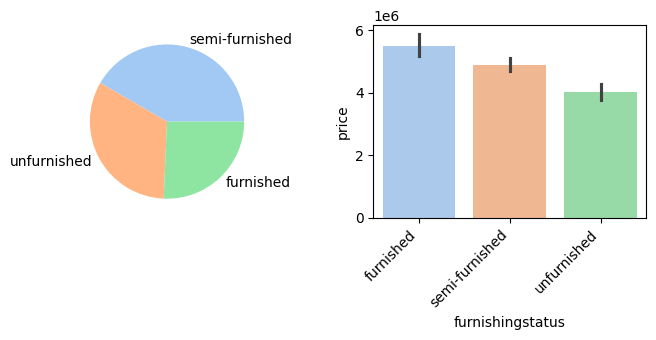

In [28]:
Figure, Axes = plt.subplots(1, 2)
FurnishingStatus_Count = Cleaned_House_Price['furnishingstatus'].value_counts()
FurnishingStatus_Label = FurnishingStatus_Count.index
Axes[0].pie(FurnishingStatus_Count, labels = FurnishingStatus_Label)
sns.barplot(Cleaned_House_Price, x = 'furnishingstatus', y = 'price', ax = Axes[1], palette="pastel")
Axes[1].set_xticklabels(Axes[1].get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()

此数据集中简装和毛坯的房子较多, 1/4 左右房子为精装。<br>
<br>
从平均房价与装修状态之间的柱状图来看, 精装的房子价格高于简装, 简装高于毛坯。

#### 分析数据

In [29]:
Cleaned_House_Price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


在分析步骤中, 我们将利用`Cleaned_House_Price`的数据, 进行线性回归分析, 目标是得到一个可以根据房屋各个属性对价格进行预测的数学模型。

In [30]:
import statsmodels.api as sm

In [31]:
Cleaned_House_Price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


然后可以创建一个新的DataFrame`Lr_House_Price`, 让它作为我们进行线性回归分析所用的数据。<br>
<br>
和`Cleaned_House_Price`区分开的原因是, 我们在进行回归分析前, 可能需要对数据进行一些准备, 比如引入虚拟变量, 这些都可以在`Lr_House_Price`上执行。

In [32]:
Lr_House_Price = Cleaned_House_Price.copy()

In [33]:
Lr_House_Price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


由于数据里存在分类变量, 无法直接建立线性回归模型, 我们需要引入虚拟变量, 也就是用0和1分别表示是否属于该分类。

In [34]:
Lr_House_Price = pd.get_dummies(Lr_House_Price, drop_first= True, columns=['mainroad', 'guestroom', 
                                                                           'basement', 'hotwaterheating', 
                                                                           'airconditioning', 'prefarea', 
                                                                           'furnishingstatus'], dtype = int)
Lr_House_Price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


接下来，我们要把因变量和自变量划分出来。<br>
<br>
因变量是`price`变量, 因为我们进行线性回归的目的, 是得到一个能根据其它可能对房屋价格有影响的变量, 来预测销售价格的模型。

In [35]:
y = Lr_House_Price['price']

我们可以把出价格之外的都纳入自变量, 但需要查看它们之间的相关性, 会导致共线性。

In [36]:
x = Lr_House_Price.drop('price', axis = 1)

In [37]:
x.corr().abs() > 0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


从以上输出来看, 不同变量之间相关系数的绝对值均小于或等于0.8。<br>
<br>
接下来, 给模型的线性方程添加截距。

In [38]:
X = sm.add_constant(x)
X

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


下一步就可以调用OLS函数, 利用最小二乘法来得到线性回归模型的参考值。

In [39]:
Model = sm.OLS(y, X).fit()

为了查看模型结果, 我们使用`Summary`方法来获得总结信息。

In [40]:
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Wed, 18 Sep 2024   Prob (F-statistic):          9.07e-123
Time:                        18:12:16   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

当我们把显著区间设定为0.05时, 以上结果的P值可以看出, 模型认为以下因素对房屋价格没有显著性影响: 卧室数、是否为简装房。此外,常数 (表示线性方程的截距) 的P值也很大1, 说明也没有显著影响。<br>
<br>
可以把这些变量移除后, 再次建立线性回归模型。

In [41]:
X = X.drop(['const', 'bedrooms', 'furnishingstatus_semi-furnished'], axis = 1)

In [42]:
Model = sm.OLS(y, X).fit()

In [43]:
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):                        0.00
Time:                        18:12:16   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

可以看到, 当我们把P值较大的自变量从线性回归模型中移除后, R方的值从0.682增长到了0.957, 提高了模型对现有数据的拟合度。<br>
<br>
根据各个自变量在线性回归方程中的系数来看, 模型预测以下因素的增加 (或存在) 会显著增加房屋价格: 房屋面积、厕所数、楼层数、车库容量、位于主路、有客房、有地下室、有热水器、有空调、位于城市首选社区。<br>
<br>
线性回归预测以下因素的增加 (或存在) 会显著降低房屋的价格: 房屋未经装修, 为毛坯房。

In [44]:
# 要预测房价的房屋的信息:
# 面积为6500平方英尺, 有4个卧室、2个厕所，总共2层, 不位于主路, 无客人房, 带地下室, 有热水器, 没有空调, 车位数为2, 位于城是首选社区, 简装修。

In [80]:
Price_To_Predict = pd.DataFrame({'area': [5600], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'], 
                                 'basement': ['yes'], 'hotwaterheating': ['yes'], 
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'], 
                                 'furnishingstatus': ['semi-furnished']})
Price_To_Predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


我们需要把分类变量的类型转换为Category, 并且通过`categories`参数, 让程序知道所有可能的分类值。这样做的原因是, 预测函数包含的分类可能不全。我们需要确保引入虚拟变量的时候, 不会漏掉某个或某些分类。

In [81]:
Price_To_Predict['mainroad'] = pd.Categorical(Price_To_Predict['mainroad'], categories=['yes', 'no'])
Price_To_Predict['guestroom'] = pd.Categorical(Price_To_Predict['guestroom'], categories=['yes', 'no'])
Price_To_Predict['basement'] = pd.Categorical(Price_To_Predict['basement'], categories=['yes', 'no'])
Price_To_Predict['hotwaterheating'] = pd.Categorical(Price_To_Predict['hotwaterheating'], categories=['yes', 'no'])
Price_To_Predict['airconditioning'] = pd.Categorical(Price_To_Predict['airconditioning'], categories=['yes', 'no'])
Price_To_Predict['prefarea'] = pd.Categorical(Price_To_Predict['prefarea'], categories=['yes', 'no'])
Price_To_Predict['furnishingstatus'] = pd.Categorical(Price_To_Predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

下一步, 对分类变量引入虚拟变量。

In [82]:
Price_To_Predict = pd.get_dummies(Price_To_Predict, drop_first=True,
                                  columns=['mainroad', 'guestroom', 
                                           'basement', 'hotwaterheating', 
                                           'airconditioning', 'prefarea', 
                                           'furnishingstatus'], dtype = int)
Price_To_Predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,guestroom_no,basement_no,hotwaterheating_no,airconditioning_no,prefarea_no,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,1,1,0,0,1,0,1,0


In [83]:
X

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,3,1,0,0,0,1,0,0
2,9960,2,2,2,1,0,1,0,0,1,0
3,7500,2,2,3,1,0,1,0,1,1,0
4,7420,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,1,2,1,0,1,0,0,0,1
541,2400,1,1,0,0,0,0,0,0,0,0
542,3620,1,1,0,1,0,0,0,0,0,1
543,2910,1,1,0,0,0,0,0,0,0,0


In [84]:
Price_To_Predict = Price_To_Predict.drop(['bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

接下来就可以调用线性回归模型的`predict`方法, 获得预测价格。

In [85]:
Predict_Value = Model.predict(Price_To_Predict)
Predict_Value

0    6.765868e+06
dtype: float64

线性回归模型预测的价格为: 6765868。